### Question 1

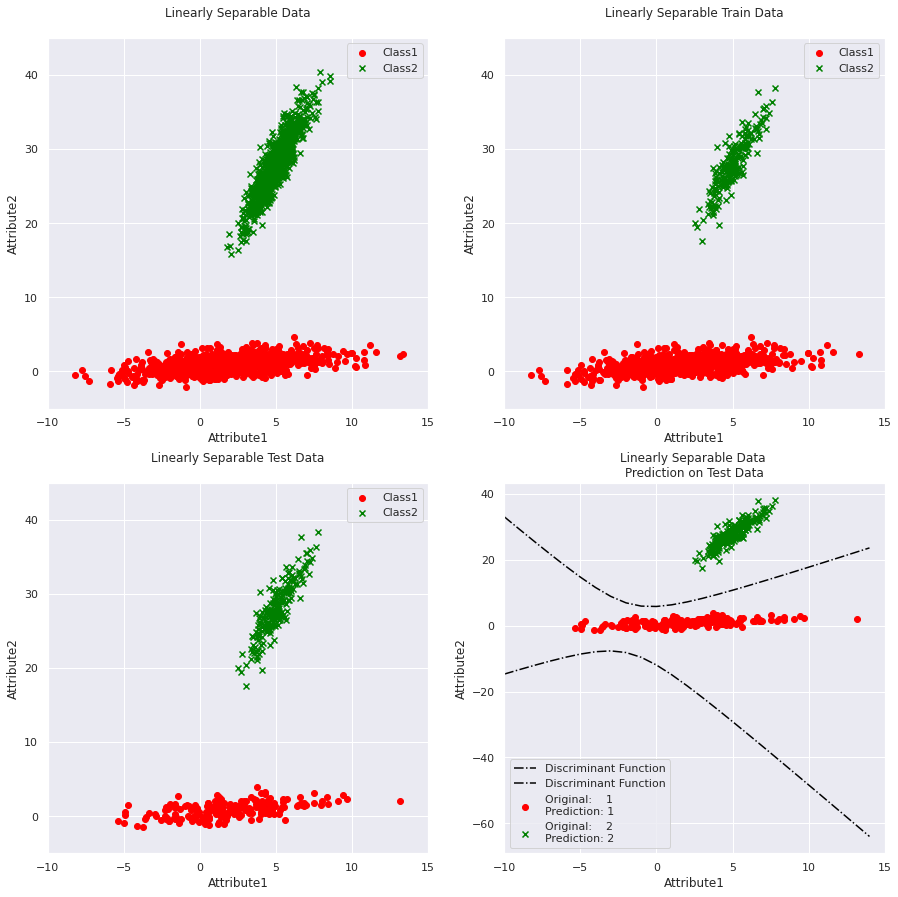


Confusion Matrix:
[[200.   0.]
 [  0. 200.]]
Accuracy:
100.0


In [ ]:
# Question 1a
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Read data
df=pd.read_csv('class1_ls.txt',sep=',',header=None,dtype=np.float64)
df1=pd.read_csv('class2_ls.txt',sep=',',header=None,dtype=np.float64)

Data1=df.to_numpy()
Data2=df1.to_numpy()

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,15))

# Scatter Plots
# plot(Data1,Data2,datatype='ls')
ax1.scatter(Data1.T[0],Data1.T[1],label='Class1',color='red',marker='o')
ax1.scatter(Data2.T[0],Data2.T[1],label='Class2',color='green',marker='x')
ax1.set_xlabel('Attribute1')
ax1.set_ylabel('Attribute2')
ax1.set_title('Linearly Separable Data\n')
ax1.set_xlim(-10,15)
ax1.set_ylim(-5,45)
ax1.legend(loc='best')
ax1.grid(True)

# Splitting Data into test and train
indices = np.random.permutation(Data1.shape[0])
training_idx, test_idx = indices[:int(0.8*Data1.shape[0])], indices[int(0.8*Data1.shape[0]):]
Data1_train, Data1_test = Data1[training_idx,:], Data1[test_idx,:]

indices = np.random.permutation(Data2.shape[0])
training_idx, test_idx = indices[:int(0.8*Data2.shape[0])], indices[int(0.8*Data2.shape[0]):]
Data2_train, Data2_test = Data2[training_idx,:], Data2[test_idx,:]

# Plotting scatter plots for the data
# plot(Data1_train,Data2_train,title='Training Data',datatype='ls')
ax2.scatter(Data1_train.T[0],Data1_train.T[1],label='Class1',color='red',marker='o')
ax2.scatter(Data2_test.T[0],Data2_test.T[1],label='Class2',color='green',marker='x')
ax2.set_xlabel('Attribute1')
ax2.set_ylabel('Attribute2')
ax2.set_title('Linearly Separable Train Data\n')
ax2.set_xlim(-10,15)
ax2.set_ylim(-5,45)
ax2.legend(loc='best')
ax2.grid(True)

# plot(Data1_test,Data2_test,title='Test Data',datatype='ls')
ax3.scatter(Data1_test.T[0],Data1_test.T[1],label='Class1',color='red',marker='o')
ax3.scatter(Data2_test.T[0],Data2_test.T[1],label='Class2',color='green',marker='x')
ax3.set_xlabel('Attribute1')
ax3.set_ylabel('Attribute2')
ax3.set_title('Linearly Separable Test Data\n')
ax3.set_xlim(-10,15)
ax3.set_ylim(-5,45)
ax3.legend(loc='best')
ax3.grid(True)

# Getting mean and covariance for Data 1
Mean_Data1 = Data1_train.mean(axis=0)
Mean_Data1  = Mean_Data1.reshape(2,1)
Cov_Data1  = np.matrix(np.cov(Data1_train.T))

# Calculating prior
Prior1 = len(Data1_train)/(len(Data1_train)+len(Data2_train))

# Getting W1 and W10
W1 = -1/2* Cov_Data1**-1
w1 = Cov_Data1**-1 *Mean_Data1
w10 = -1/2 * Mean_Data1.T * Cov_Data1**-1 *Mean_Data1 -1/2*np.log(np.linalg.det(Cov_Data1**-1)) + np.log(Prior1)

# Getting mean and covariance for Data 2
Mean_Data2 = Data2_train.mean(axis=0)
Mean_Data2  = Mean_Data2.reshape(2,1)
Cov_Data2  = np.matrix(np.cov(Data2_train.T))

# Calculating prior
Prior2 = len(Data2_train)/(len(Data1_train)+len(Data2_train))

# Getting W2 and W20
W2 = -1/2* Cov_Data2**-1
w2 = Cov_Data2**-1 *Mean_Data2
w20 = -1/2 * Mean_Data2.T * Cov_Data2**-1 *Mean_Data2 -1/2*np.log(np.linalg.det(Cov_Data2**-1)) + np.log(Prior2)

# Initialising Confusion Matrix
Confusion_Matrix = np.zeros((2,2))
C1_C1 = []
C1_C2 = []
C2_C1 = []
C2_C2 = []

# Case 3: Unknown sigma and mu
# Preparing CM for data 1
for x in Data1_test:
    x = x.reshape(2,1)
    g1 = x.T * W1 *x + w1.T * x + w10
    g2 = x.T * W2 *x + w2.T * x + w20

    if g1>=g2:
        Confusion_Matrix[0][0]+=1
        C1_C1.append(x)
    else:
        Confusion_Matrix[0][1]+=1
        C1_C2.append(x)

# Preparing CM for data 2
for x in Data2_test:
    x = x.reshape(2,1)
    g1 = x.T * W1 *x + w1.T * x + w10
    g2 = x.T * W2 *x + w2.T * x + w20

    if g1>g2:
        Confusion_Matrix[1][0]+=1
        C2_C1.append(x)
    else:
        Confusion_Matrix[1][1]+=1
        C2_C2.append(x)

C1_C1 = np.array(C1_C1)
C1_C2 = np.array(C1_C2)
C2_C1 = np.array(C2_C1)
C2_C2 = np.array(C2_C2)

# Plotting scatter plots for final predictions
if C1_C1.size!=0:
    C1_C1=C1_C1.reshape(C1_C1.size//2,2)
    ax4.scatter(C1_C1.T[0], C1_C1.T[1],label='Original:    1\nPrediction: 1',color='red',marker='o')
if C2_C2.size!=0:
    C2_C2=C2_C2.reshape(C2_C2.size//2,2)
    ax4.scatter(C2_C2.T[0], C2_C2.T[1],label='Original:    2\nPrediction: 2',color='green',marker='x')
if C1_C2.size!=0:
    C1_C2=C1_C2.reshape(C1_C2.size//2,2)
    ax4.scatter(C1_C2.T[0], C1_C2.T[1],label='Original:    1\nPrediction: 2',color='green',marker='o')
if C2_C1.size!=0:
    C2_C1=C2_C1.reshape(C2_C1.size//2,2)
    ax4.scatter(C2_C1.T[0], C2_C1.T[1],label='Original:    2\nPrediction: 1',color='red',marker='x')

x = np.arange(-10,15)
W = np.array(W1 - W2)
w = np.array(w1 - w2)
w0 = np.array(w10 - w20)
a = W[0][0]
b = W[1][0]
c = W[1][1]
d = w[0]
e = w[1]
y = (-(2*b*x+e) + np.sqrt((2*b*x+e)**2 - 4*c*(a*x*x + d*x + w0)))/(2*c)
ax4.plot(x,y.T,label='Discriminant Function',color='Black',linestyle='-.')
y = (-(2*b*x+e) - np.sqrt((2*b*x+e)**2 - 4*c*(a*x*x + d*x + w0)))/(2*c)
ax4.plot(x,y.T,label='Discriminant Function',color='Black',linestyle='-.')

ax4.set_title('Linearly Separable Data \nPrediction on Test Data')
ax4.set_xlabel('Attribute1')
ax4.set_ylabel('Attribute2')
ax4.set_xlim(-10,15)
#plt.ylim(-5,45)
ax4.legend()
ax4.grid(True)
plt.show()
print('\nConfusion Matrix:')
print(Confusion_Matrix)
print("Accuracy:")
print((Confusion_Matrix[0][0]+Confusion_Matrix[1][1])/Confusion_Matrix.sum()*100)

In [ ]:
Cv_Data1  = np.matrix(np.cov(Data1.T))
Cv_Data2  = np.matrix(np.cov(Data2.T))
print(Cv_Data1)
print(Cv_Data2)

[[9.97930913 1.47112925]
 [1.47112925 0.98963196]]
[[ 0.99793417  3.47739633]
 [ 3.47739633 14.85935482]]


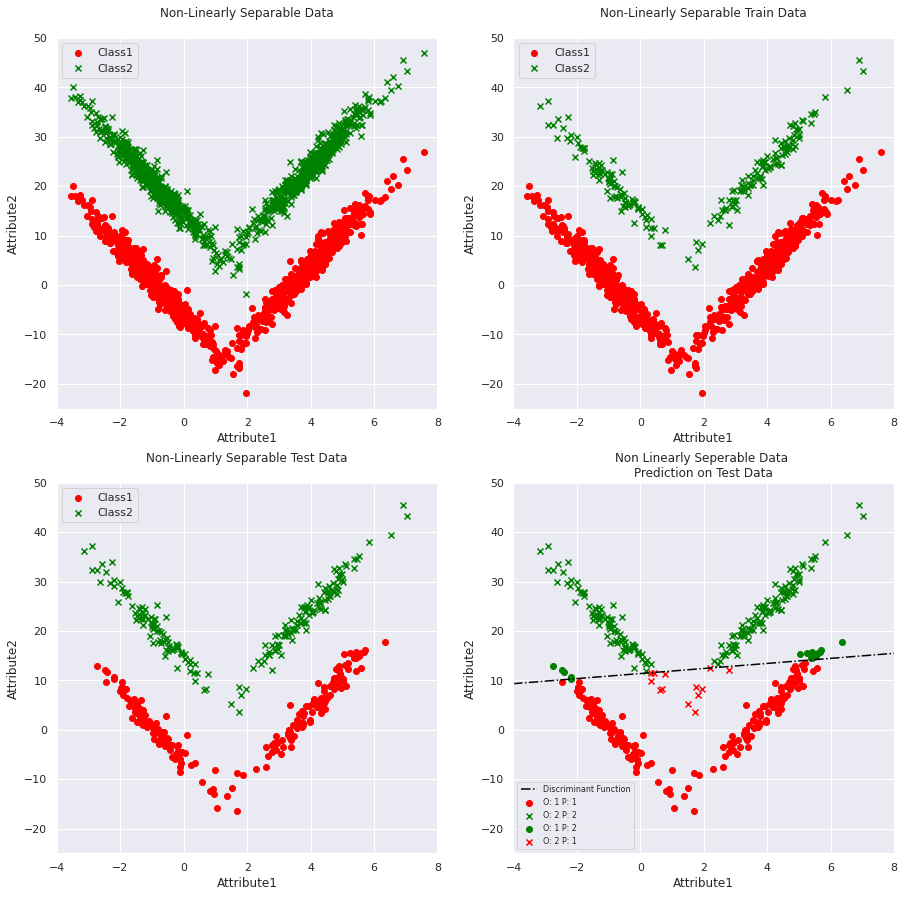


Confusion Matrix:
[[185.  15.]
 [ 13. 187.]]
Accuracy:
93.0


In [ ]:
# Question 1b
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Read data
df=pd.read_csv('class1_nls.txt',sep=',',header=None,dtype=np.float64)
df1=pd.read_csv('class2_nls.txt',sep=',',header=None,dtype=np.float64)

Data1=df.to_numpy()
Data2=df1.to_numpy()

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,15))

# Plotting
ax1.scatter(Data1.T[0],Data1.T[1],label='Class1',color='red',marker='o')
ax1.scatter(Data2.T[0],Data2.T[1],label='Class2',color='green',marker='x')
ax1.set_xlabel('Attribute1')
ax1.set_ylabel('Attribute2')
ax1.set_title('Non-Linearly Separable Data\n')
ax1.set_xlim(-4,8)
ax1.set_ylim(-25,50)
ax1.legend(loc='best')
ax1.grid(True)

# Splitting Data into Train and test
indices = np.random.permutation(Data1.shape[0])
training_idx, test_idx = indices[:int(0.8*Data1.shape[0])], indices[int(0.8*Data1.shape[0]):]
Data1_train, Data1_test = Data1[training_idx,:], Data1[test_idx,:]

indices = np.random.permutation(Data2.shape[0])
training_idx, test_idx = indices[:int(0.8*Data2.shape[0])], indices[int(0.8*Data2.shape[0]):]
Data2_train, Data2_test = Data2[training_idx,:], Data2[test_idx,:]


# plot(Data1_train,Data2_train,title='Training Data',datatype='nls')
ax2.scatter(Data1_train.T[0],Data1_train.T[1],label='Class1',color='red',marker='o')
ax2.scatter(Data2_test.T[0],Data2_test.T[1],label='Class2',color='green',marker='x')
ax2.set_xlabel('Attribute1')
ax2.set_ylabel('Attribute2')
ax2.set_title('Non-Linearly Separable Train Data\n')
ax2.set_xlim(-4,8)
ax2.set_ylim(-25,50)
ax2.legend(loc='best')
ax2.grid(True)

# plot(Data1_test,Data2_test,title='Test Data',datatype='nls')
ax3.scatter(Data1_test.T[0],Data1_test.T[1],label='Class1',color='red',marker='o')
ax3.scatter(Data2_test.T[0],Data2_test.T[1],label='Class2',color='green',marker='x')
ax3.set_xlabel('Attribute1')
ax3.set_ylabel('Attribute2')
ax3.set_title('Non-Linearly Separable Test Data\n')
ax3.set_xlim(-4,8)
ax3.set_ylim(-25,50)
ax3.legend(loc='best')
ax3.grid(True)


# Getting mean and covariance for Data 1
Mean_Data1 = Data1_train.mean(axis=0)
Mean_Data1  = Mean_Data1.reshape(2,1)
Cov_Data1  = np.matrix(np.cov(Data1_train.T))

# Calculating prior for Data 1
Prior1 = len(Data1_train)/(len(Data1_train)+len(Data2_train))

# Calculating weights
w1 = Cov_Data1**-1 *Mean_Data1
w10 = -1/2 * Mean_Data1.T * Cov_Data1**-1 *Mean_Data1 + np.log(Prior1)

# Getting mean and covariance for Data 2
Mean_Data2 = Data2_train.mean(axis=0)
Mean_Data2  = Mean_Data2.reshape(2,1)
Cov_Data2  = np.matrix(np.cov(Data2_train.T))

# Calculating prior for Data 2
Prior2 = len(Data2_train)/(len(Data1_train)+len(Data2_train))

# Calculating weights
w2 = Cov_Data2**-1 *Mean_Data2
w20 = -1/2 * Mean_Data2.T * Cov_Data2**-1 *Mean_Data2 + np.log(Prior2)

# Initialing CM
Confusion_Matrix = np.zeros((2,2))
C1_C1 = []
C1_C2 = []
C2_C1 = []
C2_C2 = []

# Preparing CM for Data 1
for x in Data1_test:
    x = x.reshape(2,1)
    g1 =  w1.T * x + w10
    g2 =  w2.T * x + w20

    if g1>=g2:
        Confusion_Matrix[0][0]+=1
        C1_C1.append(x)
    else:
        Confusion_Matrix[0][1]+=1
        C1_C2.append(x)

# Preparing CM for Data 2
for x in Data2_test:
    x = x.reshape(2,1)
    g1 =  w1.T * x + w10
    g2 =  w2.T * x + w20

    if g1>g2:
        Confusion_Matrix[1][0]+=1
        C2_C1.append(x)
    else:
        Confusion_Matrix[1][1]+=1
        C2_C2.append(x)

C1_C1 = np.array(C1_C1)
C1_C2 = np.array(C1_C2)
C2_C1 = np.array(C2_C1)
C2_C2 = np.array(C2_C2)

# Making the scatter plots for prediction
if C1_C1.size!=0:
    C1_C1=C1_C1.reshape(C1_C1.size//2,2)
    ax4.scatter(C1_C1.T[0], C1_C1.T[1],label='O: 1 P: 1',color='red',marker='o')
if C2_C2.size!=0:
    C2_C2=C2_C2.reshape(C2_C2.size//2,2)
    ax4.scatter(C2_C2.T[0], C2_C2.T[1],label='O: 2 P: 2',color='green',marker='x')
if C1_C2.size!=0:
    C1_C2=C1_C2.reshape(C1_C2.size//2,2)
    ax4.scatter(C1_C2.T[0], C1_C2.T[1],label='O: 1 P: 2',color='green',marker='o')
if C2_C1.size!=0:
    C2_C1=C2_C1.reshape(C2_C1.size//2,2)
    ax4.scatter(C2_C1.T[0], C2_C1.T[1],label='O: 2 P: 1',color='red',marker='x')

x = np.arange(-6,8)
w = Cov_Data2**-1 * (Mean_Data1-Mean_Data2)
x0= (Mean_Data1 + Mean_Data2) /2
ax4.plot(x+x0[0],-float(w[0]/w[1])*x+x0[1],label='Discriminant Function',color='Black',linestyle='-.')
ax4.set_title('Non Linearly Seperable Data \nPrediction on Test Data')
ax4.set_xlabel('Attribute1')
ax4.set_ylabel('Attribute2')
ax4.set_xlim(-4,8)
ax4.set_ylim(-25,50)
ax4.legend(fontsize=8)
ax4.grid(True)
plt.show()
print('\nConfusion Matrix:')
print(Confusion_Matrix)
print("Accuracy:")
print((Confusion_Matrix[0][0]+Confusion_Matrix[1][1])/Confusion_Matrix.sum()*100)

In [ ]:
Cv_Data1  = np.matrix(np.cov(Data1.T))
Cv_Data2  = np.matrix(np.cov(Data2.T))
print(Cv_Data1)
print(Cv_Data2)

[[ 7.05469107  3.87595689]
 [ 3.87595689 52.28351324]]
[[ 7.05469107  3.87599382]
 [ 3.87599382 52.28346295]]


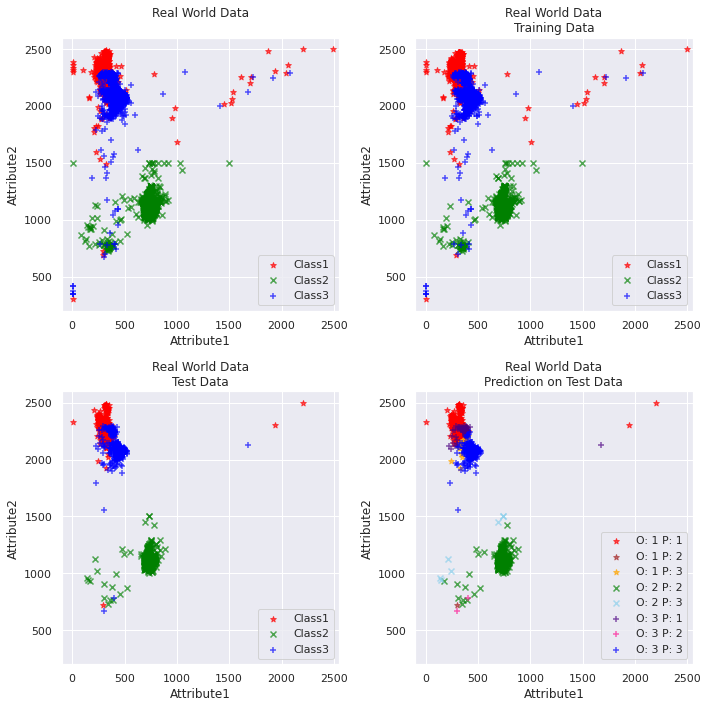


Confusion Matrix:
[[460.   1.  17.]
 [  0. 426.   7.]
 [ 84.   2. 373.]]
Accuracy:
91.89781021897811


In [ ]:
# Question 1c
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function for plotting Data1, Data2 and Data3
def plot1(Data1,Data2,Data3,a,b,title = ''):
    ax[a,b].scatter(Data1.T[0],Data1.T[1],label='Class1',alpha=2/3,color='red',marker='*')
    ax[a,b].scatter(Data2.T[0],Data2.T[1],label='Class2',alpha=2/3,color='green',marker='x')
    ax[a,b].scatter(Data3.T[0],Data3.T[1],label='Class3',alpha=2/3,color='blue',marker='+')
    ax[a,b].set_xlabel('Attribute1')
    ax[a,b].set_ylabel('Attribute2')
    ax[a,b].set_title('Real World Data\n'+title)
    ax[a,b].set_xlim(-100,2550)
    ax[a,b].set_ylim(200,2600)
    ax[a,b].legend()
    ax[a,b].grid(True)
    fig.tight_layout()


# Read data
df=pd.read_csv('class1_rwd.txt',sep=' ',header=None,dtype=np.float64)
df.columns=['Attribute 1', 'Attribute 2','Garbage']
df=df.drop(['Garbage'],axis=1)

df1=pd.read_csv('class2_rwd.txt',sep=' ',header=None,dtype=np.float64)
df1.columns=['Attribute 1', 'Attribute 2','Garbage']
df1=df1.drop(['Garbage'],axis=1)

df2=pd.read_csv('class3_rwd.txt',sep=' ',header=None,dtype=np.float64)
df2.columns=['Attribute 1', 'Attribute 2','Garbage']
df2=df2.drop(['Garbage'],axis=1)

Data1=df.to_numpy()
Data2=df1.to_numpy()
Data3=df2.to_numpy()

fig,ax = plt.subplots(2,2,figsize=(10,10))

# Plotting Data1, Data2 and Data3
plot1(Data1,Data2,Data3,a=0,b=0)

# Splitting Data into Train and test
indices = np.random.permutation(Data1.shape[0])
training_idx, test_idx = indices[:int(0.8*Data1.shape[0])], indices[int(0.8*Data1.shape[0]):]
Data1_train, Data1_test = Data1[training_idx,:], Data1[test_idx,:]

indices = np.random.permutation(Data2.shape[0])
training_idx, test_idx = indices[:int(0.8*Data2.shape[0])], indices[int(0.8*Data2.shape[0]):]
Data2_train, Data2_test = Data2[training_idx,:], Data2[test_idx,:]

indices = np.random.permutation(Data3.shape[0])
training_idx, test_idx = indices[:int(0.8*Data3.shape[0])], indices[int(0.8*Data3.shape[0]):]
Data3_train, Data3_test = Data3[training_idx,:], Data3[test_idx,:]

# Plotting
plot1(Data1_train,Data2_train,Data3_train,a=0,b=1,title='Training Data')
plot1(Data1_test,Data2_test,Data3_test,a=1,b=0,title='Test Data')

# Getting the mean and covariance matrix of Data1
Mean_Data1 = Data1_train.mean(axis=0)
Mean_Data1  = Mean_Data1.reshape(2,1)
Cov_Data1  = np.matrix(np.cov(Data1_train.T))
Prior1 = len(Data1_train)/(len(Data1_train)+len(Data2_train)+len(Data3_train))
W1 = -1/2* Cov_Data1**-1
w1 = Cov_Data1**-1 *Mean_Data1
w10 = -1/2 * Mean_Data1.T * Cov_Data1**-1 *Mean_Data1 -1/2*np.log(np.linalg.det(Cov_Data1**-1)) + np.log(Prior1)

# Getting the mean and covariance matrix of Data2
Mean_Data2 = Data2_train.mean(axis=0)
Mean_Data2  = Mean_Data2.reshape(2,1)
Cov_Data2  = np.matrix(np.cov(Data2_train.T))
Prior2 = len(Data2_train)/(len(Data1_train)+len(Data2_train)+len(Data3_train))
W2 = -1/2* Cov_Data2**-1
w2 = Cov_Data2**-1 *Mean_Data2
w20 = -1/2 * Mean_Data2.T * Cov_Data2**-1 *Mean_Data2 -1/2*np.log(np.linalg.det(Cov_Data2**-1)) + np.log(Prior2)

# Getting the mean and covariance matrix of Data3
Mean_Data3 = Data3_train.mean(axis=0)
Mean_Data3  = Mean_Data3.reshape(2,1)
Cov_Data3  = np.matrix(np.cov(Data3_train.T))
Prior3 = len(Data3_train)/(len(Data1_train)+len(Data2_train)+len(Data3_train))
W3 = -1/2* Cov_Data3**-1
w3 = Cov_Data3**-1 *Mean_Data3
w30 = -1/2 * Mean_Data3.T * Cov_Data3**-1 *Mean_Data3 -1/2*np.log(np.linalg.det(Cov_Data3**-1)) + np.log(Prior3)

# Initialising CM
Confusion_Matrix = np.zeros((3,3))
C1_C1 = []
C1_C2 = []
C1_C3 = []
C2_C1 = []
C2_C2 = []
C2_C3 = []
C3_C1 = []
C3_C2 = []
C3_C3 = []

# Prediction for Data1, Data2 and Data3
for x in Data1_test:
    x = x.reshape(2,1)
    g1 = x.T * W1 *x + w1.T * x + w10
    g2 = x.T * W2 *x + w2.T * x + w20
    g3 = x.T * W3 *x + w3.T * x + w30
    if g1>=g2 and g1>=g3 :
        Confusion_Matrix[0][0]+=1
        C1_C1.append(x)
    elif g2>g1 and g2>=g3:
        Confusion_Matrix[0][1]+=1
        C1_C2.append(x)
    else:
        Confusion_Matrix[0][2]+=1
        C1_C3.append(x)

for x in Data2_test:
    x = x.reshape(2,1)
    g1 = x.T * W1 *x + w1.T * x + w10
    g2 = x.T * W2 *x + w2.T * x + w20
    g3 = x.T * W3 *x + w3.T * x + w30
    if g1>g2 and g1>=g3:
        Confusion_Matrix[1][0]+=1
        C2_C1.append(x)
    elif g2>=g1 and g2>=g3:
        Confusion_Matrix[1][1]+=1
        C2_C2.append(x)
    else:
        Confusion_Matrix[1][2]+=1
        C2_C3.append(x)

for x in Data3_test:
    x = x.reshape(2,1)
    g1 = x.T * W1 *x + w1.T * x + w10
    g2 = x.T * W2 *x + w2.T * x + w20
    g3 = x.T * W3 *x + w3.T * x + w30
    if g1>=g2 and g1>=g3:
        Confusion_Matrix[2][0]+=1
        C3_C1.append(x)
    elif g2>g1 and g2>=g3:
        Confusion_Matrix[2][1]+=1
        C3_C2.append(x)
    else:
        Confusion_Matrix[2][2]+=1
        C3_C3.append(x)

C1_C1 = np.array(C1_C1)
C1_C2 = np.array(C1_C2)
C1_C3 = np.array(C1_C3)
C2_C1 = np.array(C2_C1)
C2_C2 = np.array(C2_C2)
C2_C3 = np.array(C2_C3)
C3_C1 = np.array(C3_C1)
C3_C2 = np.array(C3_C2)
C3_C3 = np.array(C3_C3)

# making the scatter plots
if C1_C1.size!=0:
    C1_C1=C1_C1.reshape(C1_C1.size//2,2)
    ax[1,1].scatter(C1_C1.T[0], C1_C1.T[1],label='O: 1 P: 1',alpha=2/3,color='red',marker='*')
if C1_C2.size!=0:
    C1_C2=C1_C2.reshape(C1_C2.size//2,2)
    ax[1,1].scatter(C1_C2.T[0], C1_C2.T[1],label='O: 1 P: 2',alpha=2/3,color='brown',marker='*')
if C1_C3.size!=0:
    C1_C3=C1_C3.reshape(C1_C3.size//2,2)
    ax[1,1].scatter(C1_C3.T[0], C1_C3.T[1],label='O: 1 P: 3',alpha=2/3,color='orange',marker='*')
if C2_C1.size!=0:
    C2_C1=C2_C1.reshape(C2_C1.size//2,2)
    ax[1,1].scatter(C2_C1.T[0], C2_C1.T[1],label='O: 2 P: 1',alpha=2/3,color='darkturquoise',marker='x')
if C2_C2.size!=0:
    C2_C2=C2_C2.reshape(C2_C2.size//2,2)
    ax[1,1].scatter(C2_C2.T[0], C2_C2.T[1],label='O: 2 P: 2',alpha=2/3,color='green',marker='x')
if C2_C3.size!=0:
    C2_C3=C2_C3.reshape(C2_C3.size//2,2)
    ax[1,1].scatter(C2_C3.T[0], C2_C3.T[1],label='O: 2 P: 3',alpha=2/3,color='skyblue',marker='x')
if C3_C1.size!=0:
    C3_C1=C3_C1.reshape(C3_C1.size//2,2)
    ax[1,1].scatter(C3_C1.T[0], C3_C1.T[1],label='O: 3 P: 1',alpha=2/3,color='indigo',marker='+')
if C3_C2.size!=0:
    C3_C2=C3_C2.reshape(C3_C2.size//2,2)
    ax[1,1].scatter(C3_C2.T[0], C3_C2.T[1],label='O: 3 P: 2',alpha=2/3,color='deeppink',marker='+')
if C3_C3.size!=0:
    C3_C3=C3_C3.reshape(C3_C3.size//2,2)
    ax[1,1].scatter(C3_C3.T[0], C3_C3.T[1],label='O: 3 P: 3',alpha=2/3,color='blue',marker='+')

# Plotting details
ax[1,1].set_title('Real World Data\nPrediction on Test Data')
ax[1,1].set_xlabel('Attribute1')
ax[1,1].set_ylabel('Attribute2')
ax[1,1].set_xlim(-100,2550)
ax[1,1].set_ylim(200,2600)
ax[1,1].legend()
ax[1,1].grid(True)
fig.tight_layout()
plt.show()
print('\nConfusion Matrix:')
print(Confusion_Matrix)
# sn.heatmap(Confusion_Matrix, annot=True)
print("Accuracy:")
print((Confusion_Matrix[0][0]+Confusion_Matrix[1][1]+Confusion_Matrix[2][2])/Confusion_Matrix.sum()*100)

### Question 2

In [ ]:
def plot(Data1,Data2,a,b,title = '',datatype = ''):
    ax[a,b].scatter(Data1.T[0],Data1.T[1],label='Class1',color='red',marker='o')
    ax[a,b].scatter(Data2.T[0],Data2.T[1],label='Class2',color='green',marker='x')
    ax[a,b].set_xlabel('Attribute1')
    ax[a,b].set_ylabel('Attribute2')
    if(datatype=='ls'):
      ax[a,b].set_title('Linearly Separable Data\n'+title)
    elif(datatype=='nls'):
      ax[a,b].set_title('Non-Linearly Separable Data\n'+title)
    else:
      ax[a,b].set_title('Data\n'+title)
    if(datatype=='ls'):
      ax[a,b].set_xlim(-10,15)
      ax[a,b].set_ylim(-5,45)
    elif(datatype=='nls'):
      ax[a,b].set_xlim(-4,8)
      ax[a,b].set_ylim(-25,50)
    ax[a,b].grid(True)
    ax[a,b].legend()

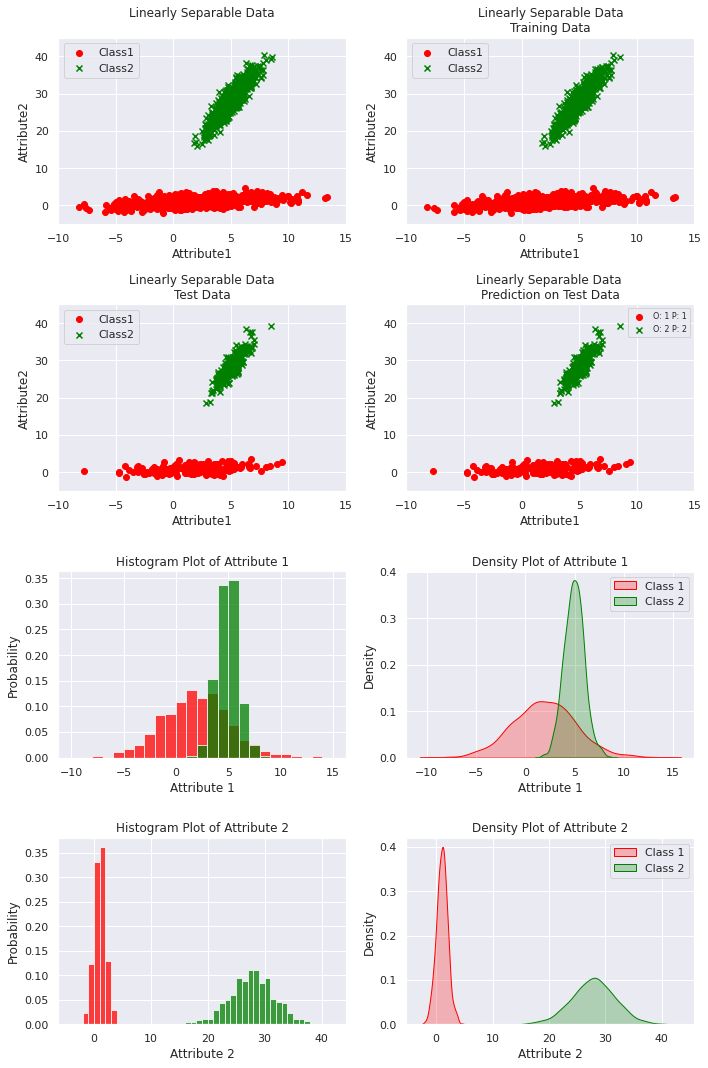


Confusion Matrix:
[[200.   0.]
 [  0. 200.]]
Accuracy:
100.0


In [ ]:
# Question 2a
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Read data
df=pd.read_csv('class1_ls.txt',sep=',',header=None,dtype=np.float64)
df1=pd.read_csv('class2_ls.txt',sep=',',header=None,dtype=np.float64)

Data1=df.to_numpy()
Data2=df1.to_numpy()

fig,ax = plt.subplots(4,2,figsize=(10,15))
sns.set()

# Scatter Plots
plot(Data1,Data2,a=0,b=0,datatype='ls')

# Split the data into Train and Test
indices = np.random.permutation(Data1.shape[0])
training_idx, test_idx = indices[:int(0.8*Data1.shape[0])], indices[int(0.8*Data1.shape[0]):]
Data1_train, Data1_test = Data1[training_idx,:], Data1[test_idx,:]

indices = np.random.permutation(Data2.shape[0])
training_idx, test_idx = indices[:int(0.8*Data2.shape[0])], indices[int(0.8*Data2.shape[0]):]
Data2_train, Data2_test = Data2[training_idx,:], Data2[test_idx,:]

# Scatter Plots of Train and Test Datasets
plot(Data1_train,Data2_train,a=0,b=1,title='Training Data',datatype='ls')
plot(Data1_test,Data2_test,a=1,b=0,title='Test Data',datatype='ls')

# Getting min and max
Min = min(Data1_train.min(axis=0)[0],Data2_train.min(axis=0)[0])
Max = max(Data1_train.max(axis=0)[0],Data2_train.max(axis=0)[0])
Min = int(Min)-2
Max = int(Max)+2

# Plotting the normalized histograms
pdf10,x1,_=ax[2,0].hist(Data1_train.T[0],density=True,alpha=3/4,color='red'  ,range=(Min,Max),bins=(Max-Min),label='Class 1')
pdf20,x2,_=ax[2,0].hist(Data2_train.T[0],density=True,alpha=3/4,color='green',range=(Min,Max),bins=(Max-Min),label='Class 2')
ax[2,0].set_xlabel('Attribute 1')
ax[2,0].set_ylabel('Probability')
ax[2,0].set_title('Histogram Plot of Attribute 1')

# Plotting the density graphs
sns.kdeplot(Data1_train.T[0],shade=True,color='red'  ,label='Class 1',ax=ax[2,1])
sns.kdeplot(Data2_train.T[0],shade=True,color='green',label='Class 2',ax=ax[2,1])
ax[2,1].set_xlabel('Attribute 1')
ax[2,1].set_title('Density Plot of Attribute 1')
ax[2,1].legend()

# Getting Min and Max of Data1 and Data2
Min = min(Data1_train.min(axis=0)[1],Data2_train.min(axis=0)[1])
Max = max(Data1_train.max(axis=0)[1],Data2_train.max(axis=0)[1])
Min = int(Min)-2
Max = int(Max)+2

# Plotting the normalized histograms
pdf11,y1,_=ax[3,0].hist(Data1_train.T[1],density=True,alpha=3/4,color='red'  ,range=(Min,Max),bins=(Max-Min),label='Class 1')
pdf21,y2,_=ax[3,0].hist(Data2_train.T[1],density=True,alpha=3/4,color='green',range=(Min,Max),bins=(Max-Min),label='Class 2')
ax[3,0].set_xlabel('Attribute 2')
ax[3,0].set_ylabel('Probability')
ax[3,0].set_title('Histogram Plot of Attribute 2')
# plt.show()

# Plotting the density graphs
sns.kdeplot(Data1_train.T[1],shade=True,color='red'  ,label='Class 1',ax=ax[3,1])
sns.kdeplot(Data2_train.T[1],shade=True,color='green',label='Class 2',ax=ax[3,1])
ax[3,1].set_xlabel('Attribute 2')
ax[3,1].set_title('Density Plot of Attribute 2')
ax[3,1].legend()
# plt.show()

# Getting Priors 1 and 2
Prior1 = len(Data1_train)/(len(Data1_train)+len(Data2_train))
Prior2 = len(Data2_train)/(len(Data1_train)+len(Data2_train))

# Initialising Confusion Matrix
Confusion_Matrix = np.zeros((2,2))
C1_C1 = []
C1_C2 = []
C2_C1 = []
C2_C2 = []

# Prediction of Data1
for x,y in Data1_test:
    x_ind = np.argmin(x1<x)-1
    y_ind = np.argmin(y1<y)-1

    P_C1 = pdf10[x_ind]*pdf11[y_ind]*Prior1
    P_C2 = pdf20[x_ind]*pdf21[y_ind]*Prior2

    if P_C1>=P_C2:
        Confusion_Matrix[0][0]+=1
        C1_C1.append((x,y))
    else:
        Confusion_Matrix[0][1]+=1
        C1_C2.append((x,y))

# Prediction of Data2
for x,y in Data2_test:
    x_ind = np.argmin(x1<x)-1
    y_ind = np.argmin(y1<y)-1

    P_C1 = pdf10[x_ind]*pdf11[y_ind]*Prior1
    P_C2 = pdf20[x_ind]*pdf21[y_ind]*Prior2

    if P_C2>=P_C1:
        Confusion_Matrix[1][1]+=1
        C2_C2.append((x,y))
    else:
        Confusion_Matrix[1][0]+=1
        C2_C1.append((x,y))

# Initialising CM
C1_C1 = np.array(C1_C1)
C1_C2 = np.array(C1_C2)
C2_C1 = np.array(C2_C1)
C2_C2 = np.array(C2_C2)

# Getting the scatter Plots
if C1_C1.size!=0:
    C1_C1=C1_C1.reshape(C1_C1.size//2,2)
    ax[1,1].scatter(C1_C1.T[0], C1_C1.T[1],label='O: 1 P: 1',color='red',marker='o')
if C2_C2.size!=0:
    C2_C2=C2_C2.reshape(C2_C2.size//2,2)
    ax[1,1].scatter(C2_C2.T[0], C2_C2.T[1],label='O: 2 P: 2',color='green',marker='x')
if C1_C2.size!=0:
    C1_C2=C1_C2.reshape(C1_C2.size//2,2)
    ax[1,1].scatter(C1_C2.T[0], C1_C2.T[1],label='O: 1 P: 2',color='green',marker='o')
if C2_C1.size!=0:
    C2_C1=C2_C1.reshape(C2_C1.size//2,2)
    ax[1,1].scatter(C2_C1.T[0], C2_C1.T[1],label='O: 2 P: 1',color='red',marker='x')

# plotting details
ax[1,1].set_title('Linearly Separable Data \nPrediction on Test Data')
ax[1,1].set_xlabel('Attribute1')
ax[1,1].set_ylabel('Attribute2')
ax[1,1].set_xlim(-10,15)
ax[1,1].set_ylim(-5,45)
ax[1,1].legend(fontsize=8)
ax[1,1].grid(True)
plt.tight_layout()
plt.show()
print('\nConfusion Matrix:')
print(Confusion_Matrix)
print("Accuracy:")
print((Confusion_Matrix[0][0]+Confusion_Matrix[1][1])/Confusion_Matrix.sum()*100)

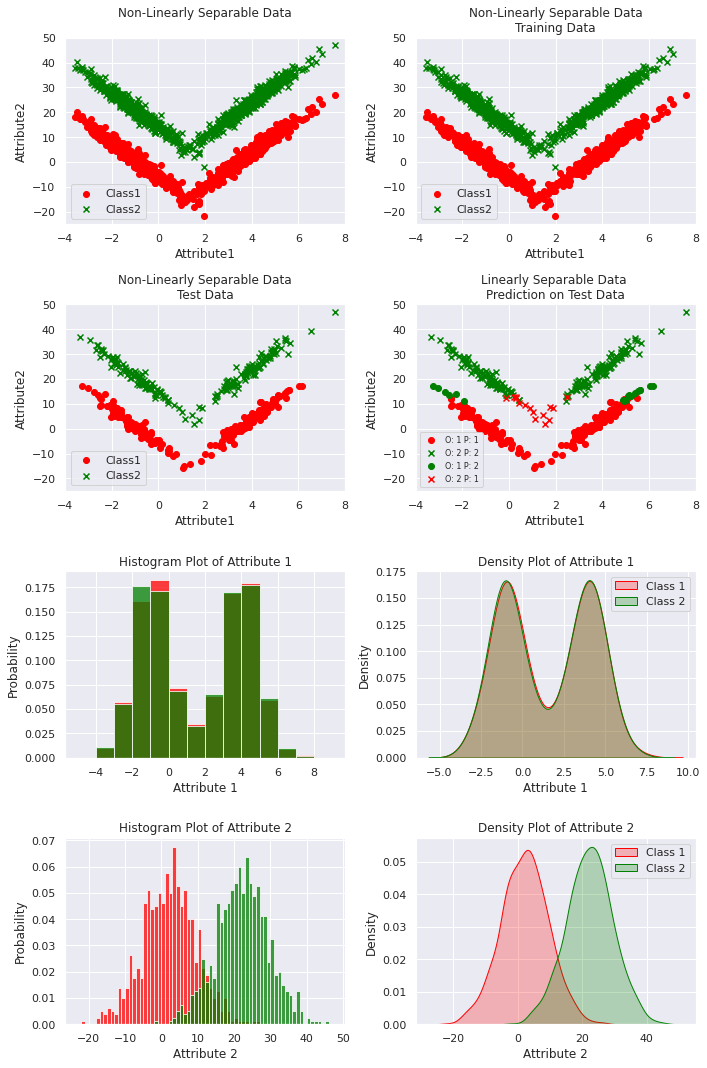


Confusion Matrix:
[[182.  18.]
 [ 15. 185.]]
Accuracy:
91.75


In [ ]:
# Question 2b
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Read data
df=pd.read_csv('class1_nls.txt',sep=',',header=None,dtype=np.float64)
df1=pd.read_csv('class2_nls.txt',sep=',',header=None,dtype=np.float64)

Data1=df.to_numpy()
Data2=df1.to_numpy()

fig,ax = plt.subplots(4,2,figsize=(10,15))
sns.set()

# Scatter Plots
plot(Data1,Data2,a=0,b=0,datatype='nls')

# Split the data into Train and Test
indices = np.random.permutation(Data1.shape[0])
training_idx, test_idx = indices[:int(0.8*Data1.shape[0])], indices[int(0.8*Data1.shape[0]):]
Data1_train, Data1_test = Data1[training_idx,:], Data1[test_idx,:]

indices = np.random.permutation(Data2.shape[0])
training_idx, test_idx = indices[:int(0.8*Data2.shape[0])], indices[int(0.8*Data2.shape[0]):]
Data2_train, Data2_test = Data2[training_idx,:], Data2[test_idx,:]

# Scatter Plots of Train and Test Datasets
plot(Data1_train,Data2_train,a=0,b=1,title='Training Data',datatype='nls')
plot(Data1_test,Data2_test,a=1,b=0,title='Test Data',datatype='nls')

# Getting min and max
Min = min(Data1_train.min(axis=0)[0],Data2_train.min(axis=0)[0])
Max = max(Data1_train.max(axis=0)[0],Data2_train.max(axis=0)[0])
Min = int(Min)-2
Max = int(Max)+2

# Plotting the normalized histograms
pdf10,x1,_=ax[2,0].hist(Data1_train.T[0],density=True,alpha=3/4,color='red'  ,range=(Min,Max),bins=(Max-Min),label='Class 1')
pdf20,x2,_=ax[2,0].hist(Data2_train.T[0],density=True,alpha=3/4,color='green',range=(Min,Max),bins=(Max-Min),label='Class 2')
ax[2,0].set_xlabel('Attribute 1')
ax[2,0].set_ylabel('Probability')
ax[2,0].set_title('Histogram Plot of Attribute 1')

# Plotting the density graphs
sns.kdeplot(Data1_train.T[0],shade=True,color='red'  ,label='Class 1',ax=ax[2,1])
sns.kdeplot(Data2_train.T[0],shade=True,color='green',label='Class 2',ax=ax[2,1])
ax[2,1].set_xlabel('Attribute 1')
ax[2,1].set_title('Density Plot of Attribute 1')
ax[2,1].legend()

# Getting Min and Max of Data1 and Data2
Min = min(Data1_train.min(axis=0)[1],Data2_train.min(axis=0)[1])
Max = max(Data1_train.max(axis=0)[1],Data2_train.max(axis=0)[1])
Min = int(Min)-2
Max = int(Max)+2

# Plotting the normalized histograms
pdf11,y1,_=ax[3,0].hist(Data1_train.T[1],density=True,alpha=3/4,color='red'  ,range=(Min,Max),bins=(Max-Min),label='Class 1')
pdf21,y2,_=ax[3,0].hist(Data2_train.T[1],density=True,alpha=3/4,color='green',range=(Min,Max),bins=(Max-Min),label='Class 2')
ax[3,0].set_xlabel('Attribute 2')
ax[3,0].set_ylabel('Probability')
ax[3,0].set_title('Histogram Plot of Attribute 2')
# plt.show()

# Plotting the density graphs
sns.kdeplot(Data1_train.T[1],shade=True,color='red'  ,label='Class 1',ax=ax[3,1])
sns.kdeplot(Data2_train.T[1],shade=True,color='green',label='Class 2',ax=ax[3,1])
ax[3,1].set_xlabel('Attribute 2')
ax[3,1].set_title('Density Plot of Attribute 2')
ax[3,1].legend()
# plt.show()

# Getting Priors 1 and 2
Prior1 = len(Data1_train)/(len(Data1_train)+len(Data2_train))
Prior2 = len(Data2_train)/(len(Data1_train)+len(Data2_train))

# Initialising Confusion Matrix
Confusion_Matrix = np.zeros((2,2))
C1_C1 = []
C1_C2 = []
C2_C1 = []
C2_C2 = []

# Prediction of Data1
for x,y in Data1_test:
    x_ind = np.argmin(x1<x)-1
    y_ind = np.argmin(y1<y)-1

    P_C1 = pdf10[x_ind]*pdf11[y_ind]*Prior1
    P_C2 = pdf20[x_ind]*pdf21[y_ind]*Prior2

    if P_C1>=P_C2:
        Confusion_Matrix[0][0]+=1
        C1_C1.append((x,y))
    else:
        Confusion_Matrix[0][1]+=1
        C1_C2.append((x,y))

# Prediction of Data2
for x,y in Data2_test:
    x_ind = np.argmin(x1<x)-1
    y_ind = np.argmin(y1<y)-1

    P_C1 = pdf10[x_ind]*pdf11[y_ind]*Prior1
    P_C2 = pdf20[x_ind]*pdf21[y_ind]*Prior2

    if P_C2>=P_C1:
        Confusion_Matrix[1][1]+=1
        C2_C2.append((x,y))
    else:
        Confusion_Matrix[1][0]+=1
        C2_C1.append((x,y))

# Initialising CM
C1_C1 = np.array(C1_C1)
C1_C2 = np.array(C1_C2)
C2_C1 = np.array(C2_C1)
C2_C2 = np.array(C2_C2)

# Getting the scatter Plots
if C1_C1.size!=0:
    C1_C1=C1_C1.reshape(C1_C1.size//2,2)
    ax[1,1].scatter(C1_C1.T[0], C1_C1.T[1],label='O: 1 P: 1',color='red',marker='o')
if C2_C2.size!=0:
    C2_C2=C2_C2.reshape(C2_C2.size//2,2)
    ax[1,1].scatter(C2_C2.T[0], C2_C2.T[1],label='O: 2 P: 2',color='green',marker='x')
if C1_C2.size!=0:
    C1_C2=C1_C2.reshape(C1_C2.size//2,2)
    ax[1,1].scatter(C1_C2.T[0], C1_C2.T[1],label='O: 1 P: 2',color='green',marker='o')
if C2_C1.size!=0:
    C2_C1=C2_C1.reshape(C2_C1.size//2,2)
    ax[1,1].scatter(C2_C1.T[0], C2_C1.T[1],label='O: 2 P: 1',color='red',marker='x')

# plotting details
ax[1,1].set_title('Linearly Separable Data \nPrediction on Test Data')
ax[1,1].set_xlabel('Attribute1')
ax[1,1].set_ylabel('Attribute2')
ax[1,1].set_xlim(-4,8)
ax[1,1].set_ylim(-25,50)
ax[1,1].legend(fontsize=8)
ax[1,1].grid(True)
plt.tight_layout()
plt.show()
print('\nConfusion Matrix:')
print(Confusion_Matrix)
print("Accuracy:")
print((Confusion_Matrix[0][0]+Confusion_Matrix[1][1])/Confusion_Matrix.sum()*100)

### That's all for today !